In [1]:
from tensorflow.keras.datasets.imdb import load_data
(x_data,y_data), (tt_x,tt_y) = load_data(num_words=500) #단어의 정의(종류)로 정의한다.
x_data.shape

17473536/17464789 [==============================] - 2s 0us/step


(25000,)

In [3]:
len(x_data[0]), len(x_data[1])

(218, 189)

In [4]:
y_data[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_t = train_test_split(x_data, y_data,test_size=0.2,random_state=42)


(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <BarContainer object of 10 artists>)

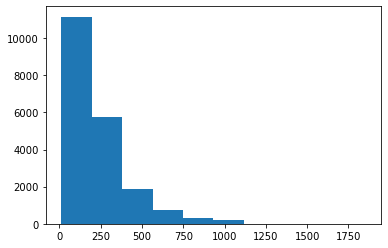

In [7]:
import numpy as np
l=np.array([len(i)for i in t_x])
import matplotlib.pyplot as plt
plt.hist(l)

In [8]:
np.median(l)

178.0

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
s_t_x=pad_sequences(t_x,maxlen=100)

In [13]:
s_t_x.shape

(20000, 100)

In [14]:
s_v_x=pad_sequences(v_x,maxlen=100)

In [24]:
from tensorflow import keras
m=keras.Sequential()

In [25]:
m.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
m.add(keras.layers.Dense(1,activation='sigmoid'))

In [28]:
t_ho=keras.utils.to_categorical(s_t_x)

In [29]:
t_ho.shape

(20000, 100, 500)

In [30]:
v_ho=keras.utils.to_categorical(s_v_x)

In [31]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [32]:
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m.compile(optimizer=ot,loss='binary_crosstropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.h5', save_best_only=True)
e_stopping=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
hy=m.fit(t_ho,t_y,epochs=100,batch_size=63,validation_data=(v_ho, v_t), callbacks=[ck_p,e_stopping])
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])


ValueError: in user code:

    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\losses.py", line 2369, in get
        return deserialize(identifier)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\losses.py", line 2324, in deserialize
        return deserialize_keras_object(
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: binary_crosstropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [36]:
m1=keras.Sequential()
m1.add(keras.layers.Embedding(500,16))

m1.add(keras.layers.SimpleRNN(8))
m1.add(keras.layers.Dense(1,activation='sigmoid'))
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m1.compile(optimizer=ot,loss='binary_crosstropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.h5', save_best_only=True)
e_stopping=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
hy=m1.fit(s_t_x,t_y,epochs=100,batch_size=63,validation_data=(s_t_x,t_y), callbacks=[ck_p,e_stopping])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\losses.py", line 2369, in get
        return deserialize(identifier)
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\losses.py", line 2324, in deserialize
        return deserialize_keras_object(
    File "C:\Users\JSWonner\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: binary_crosstropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
s_t_x=pad_sequences(t_x,maxlen=100)
s_v_x=pad_sequences(v_x,maxlen=100)
m2.add(keras.layers.Embedding(500,16,input_length=100))
m1.add(keras.layers.Dense(1,activation='sigmoid'))
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m1.compile(optimizer=ot,loss='binary_crosstropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.h5', save_best_only=True)
e_stopping=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
hy=m1.fit(s_t_x,t_y,epochs=100,batch_size=63,validation_data=(s_t_x,t_y), callbacks=[ck_p,e_stopping]) 